In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%cd data/parcoursup

C:\Users\cyril\Documents\Development\IUTRS\M22-Profs\data\parcoursup


## Parcoursup

In [3]:
df = pd.read_csv('fr-esr-parcoursup_2021.csv', sep=';')

In [4]:
df = df[['cod_uai', 'lib_for_voe_ins', 'taux_adm_psup', 'taux_adm_psup_gen', 'taux_adm_psup_techno', 'taux_adm_psup_pro']]
df.head(3)

,cod_uai,lib_for_voe_ins,taux_adm_psup,taux_adm_psup_gen,taux_adm_psup_techno,taux_adm_psup_pro
0,0751719L,"Licence - Langues, littératures & civilisation...",59.0,90.0,10.0,0.0
1,0751719L,"Licence - Langues, littératures & civilisation...",59.0,80.0,20.0,0.0
2,0751719L,"Licence - Langues, littératures & civilisation...",93.0,50.0,33.0,17.0


In [5]:
df = df[df.cod_uai == '0671557D']
df.head(3)

,cod_uai,lib_for_voe_ins,taux_adm_psup,taux_adm_psup_gen,taux_adm_psup_techno,taux_adm_psup_pro
2304,0671557D,BUT - Techniques de commercialisation Parcours...,17.0,50.0,50.0,0.0
4250,0671557D,"BUT - Chimie Parcours : Analyse, contrôle-qual...",80.0,90.0,10.0,0.0
4251,0671557D,BUT - Information communication Parcours infor...,33.0,63.0,33.0,3.0


In [6]:
df['formation'] = df.lib_for_voe_ins.str[:32]

<AxesSubplot:xlabel='formation'>

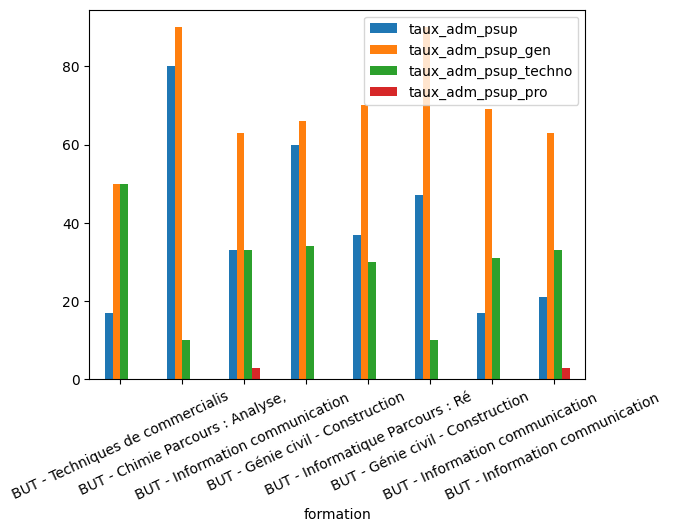

In [7]:
df.plot.bar(x='formation', rot=25)

## Parcoursup++

In [8]:
def clean_my_data(dataframe):
    dataframe = dataframe[dataframe.cod_uai == '0671557D']
    dataframe = dataframe[dataframe['fil_lib_voe_acc'].isin(['Chimie',
                                                             'Informatique',
                                                             'Techniques de commercialisation'])]
    dataframe = dataframe[['session', 'fil_lib_voe_acc', 'pct_bt']]
    dataframe = dataframe.pivot(index='session', columns='fil_lib_voe_acc', values='pct_bt')
    return dataframe

df_2018 = clean_my_data(pd.read_csv('fr-esr-parcoursup_2018.csv', sep=';'))
df_2019 = clean_my_data(pd.read_csv('fr-esr-parcoursup_2019.csv', sep=';'))
df_2020 = clean_my_data(pd.read_csv('fr-esr-parcoursup_2020.csv', sep=';'))
df_2021 = clean_my_data(pd.read_csv('fr-esr-parcoursup_2021.csv', sep=';'))

In [9]:
df = pd.concat([df_2018, df_2019, df_2020, df_2021])

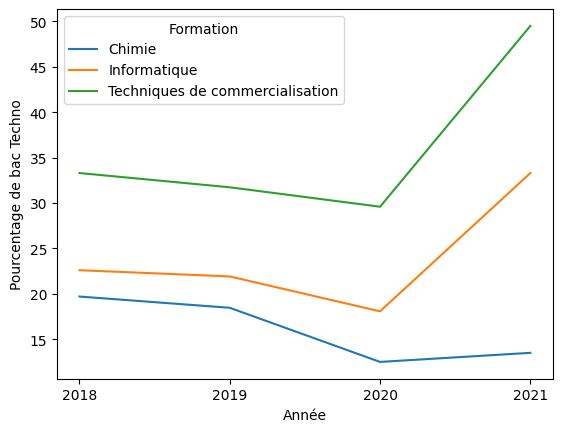

In [10]:
ax = df.plot.line()
ax.set_xticks(range(2018, 2022))
ax.set_xlabel('Année')
ax.set_ylabel('Pourcentage de bac Techno')
ax.legend().set_title("Formation")